In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading the data set

df = pd.read_csv('Lead Scoring Assignment_Leads.csv')
pd.set_option("display.max_rows", None, "display.max_columns", None)
df.head(5)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
df.shape

(9240, 37)

In [4]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [6]:
df.head(10)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
5,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,API,Olark Chat,No,No,0,0.0,0,0.0,Olark Chat Conversation,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,NaN,01.High,02.Medium,17.0,15.0,No,No,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,No,No,1,2.0,1640,2.0,Email Opened,India,Supply Chain Management,Online Search,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Low in Relevance,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,No,Modified
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,660664,API,Olark Chat,No,No,0,0.0,0,0.0,Olark Chat Conversation,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,660624,Landing Page Submission,Direct Traffic,No,No,0,2.0,71,2.0,Email Opened,India,IT Projects Management,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Thane & Outskirts,02.Medium,02.Medium,14.0,14.0,No,Yes,Email Opened
9,af465dfc-7204-4130-9e05-33231863c4b5,660616,API,Google,No,No,0,4.0,58,4.0,Email Opened,India,Finance Management,Word Of Mouth,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Mumbai,02.Medium,02.Medium,13.0,16.0,No,No,Email Opened


In [7]:
# Replacing the "Select" with null values in the columns

df = df.replace(to_replace='Select',value=np.nan)

In [8]:
df.head(10)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
5,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,API,Olark Chat,No,No,0,0.0,0,0.0,Olark Chat Conversation,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,NaN,01.High,02.Medium,17.0,15.0,No,No,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,No,No,1,2.0,1640,2.0,Email Opened,India,Supply Chain Management,Online Search,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Low in Relevance,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,No,Modified
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,660664,API,Olark Chat,No,No,0,0.0,0,0.0,Olark Chat Conversation,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,660624,Landing Page Submission,Direct Traffic,No,No,0,2.0,71,2.0,Email Opened,India,IT Projects Management,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Thane & Outskirts,02.Medium,02.Medium,14.0,14.0,No,Yes,Email Opened
9,af465dfc-7204-4130-9e05-33231863c4b5,660616,API,Google,No,No,0,4.0,58,4.0,Email Opened,India,Finance Management,Word Of Mouth,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Mumbai,02.Medium,02.Medium,13.0,16.0,No,No,Email Opened


In [9]:
# dropping the variables Lead quality, tags, Asymmetrique Activity Index
df.drop(['Lead Quality','Tags','Asymmetrique Activity Index'], axis=1, inplace = True)

In [10]:
round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [11]:
# dropping the columns having high percentage of nullv alues

df.drop(['Lead Profile','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score',
         'How did you hear about X Education'],axis=1,inplace=True)

In [12]:
df.shape

(9240, 29)

In [13]:
# Dropping the highly skewed columns

df = df.drop(['Receive More Updates About Our Courses','I agree to pay the amount through cheque','Magazine',
            'Get updates on DM Content','Update me on Supply Chain Content','Search','Newspaper','Digital Advertisement',
              'Through Recommendations','X Education Forums','Do Not Call','Do Not Email',
              'Newspaper Article','What matters most to you in choosing a course','Country'], axis=1)

In [14]:
df.shape

(9240, 14)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 14 columns):
Prospect ID                               9240 non-null object
Lead Number                               9240 non-null int64
Lead Origin                               9240 non-null object
Lead Source                               9204 non-null object
Converted                                 9240 non-null int64
TotalVisits                               9103 non-null float64
Total Time Spent on Website               9240 non-null int64
Page Views Per Visit                      9103 non-null float64
Last Activity                             9137 non-null object
Specialization                            5860 non-null object
What is your current occupation           6550 non-null object
City                                      5571 non-null object
A free copy of Mastering The Interview    9240 non-null object
Last Notable Activity                     9240 non-null object
dtypes: floa

#### Converting the least percentage values into "others" in the categorical variables

In [16]:
df.nunique().sort_values()

Converted                                    2
A free copy of Mastering The Interview       2
Lead Origin                                  5
What is your current occupation              6
City                                         6
Last Notable Activity                       16
Last Activity                               17
Specialization                              18
Lead Source                                 21
TotalVisits                                 41
Page Views Per Visit                       114
Total Time Spent on Website               1731
Prospect ID                               9240
Lead Number                               9240
dtype: int64

In [17]:
df['Lead Source'].value_counts(normalize=True)*100

Google               31.160365
Direct Traffic       27.629292
Olark Chat           19.067797
Organic Search       12.538027
Reference             5.801825
Welingak Website      1.542807
Referral Sites        1.358105
Facebook              0.597566
bing                  0.065189
google                0.054324
Click2call            0.043459
Live Chat             0.021730
Social Media          0.021730
Press_Release         0.021730
WeLearn               0.010865
NC_EDM                0.010865
blog                  0.010865
youtubechannel        0.010865
Pay per Click Ads     0.010865
welearnblog_Home      0.010865
testone               0.010865
Name: Lead Source, dtype: float64

In [18]:
df['Lead Source'] = df['Lead Source'].replace(['Welingak Website','Referral Sites','Facebook','bing','google','Click2call','Live Chat','Social Media','Press_Release','testone','Pay per Click Ads',
                    'youtubechannel','NC_EDM','welearnblog_Home','WeLearn','blog'],'others')

In [19]:
df['Lead Origin'].value_counts(normalize=True)*100

Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: Lead Origin, dtype: float64

In [20]:
df['What is your current occupation'].value_counts(normalize=True)*100

Unemployed              85.496183
Working Professional    10.778626
Student                  3.206107
Other                    0.244275
Housewife                0.152672
Businessman              0.122137
Name: What is your current occupation, dtype: float64

In [21]:
df['City'].value_counts(normalize=True)*100

Mumbai                         57.835218
Thane & Outskirts              13.498474
Other Cities                   12.313768
Other Cities of Maharashtra     8.203195
Other Metro Cities              6.821038
Tier II Cities                  1.328307
Name: City, dtype: float64

In [22]:
df['Last Notable Activity'].value_counts(normalize=True)*100

Modified                        36.872294
Email Opened                    30.595238
SMS Sent                        23.506494
Page Visited on Website          3.441558
Olark Chat Conversation          1.980519
Email Link Clicked               1.872294
Email Bounced                    0.649351
Unsubscribed                     0.508658
Unreachable                      0.346320
Had a Phone Conversation         0.151515
Email Marked Spam                0.021645
Resubscribed to emails           0.010823
Approached upfront               0.010823
Email Received                   0.010823
View in browser link Clicked     0.010823
Form Submitted on Website        0.010823
Name: Last Notable Activity, dtype: float64

In [23]:
df['Last Notable Activity'] = df['Last Notable Activity'].replace(['Olark Chat Conversation','Email Link Clicked','Email Bounced',
                                                                  'Unsubscribed','Unreachable','Had a Phone Conversation',
                                                                  'Email Marked Spam','Email Received',
                                                                  'Form Submitted on Website','View in browser link Clicked',
                                                                  'Resubscribed to emails','Approached upfront'],'others')

In [24]:
df['Last Notable Activity'].value_counts(normalize=True)*100

Modified                   36.872294
Email Opened               30.595238
SMS Sent                   23.506494
others                      5.584416
Page Visited on Website     3.441558
Name: Last Notable Activity, dtype: float64

In [25]:
df['Last Activity'].value_counts(normalize=True)*100

Email Opened                    37.616285
SMS Sent                        30.042684
Olark Chat Conversation         10.649010
Page Visited on Website          7.004487
Converted to Lead                4.684251
Email Bounced                    3.567911
Email Link Clicked               2.922185
Form Submitted on Website        1.269563
Unreachable                      1.017840
Unsubscribed                     0.667615
Had a Phone Conversation         0.328335
Approached upfront               0.098501
View in browser link Clicked     0.065667
Email Received                   0.021889
Email Marked Spam                0.021889
Visited Booth in Tradeshow       0.010945
Resubscribed to emails           0.010945
Name: Last Activity, dtype: float64

In [26]:
df['Last Activity'] = df['Last Activity'].replace(['Form Submitted on Website','Unreachable','Unsubscribed',
                                                  'Had a Phone Conversation','Approached upfront','View in browser link Clicked',
                                                  'Email Marked Spam','Email Received','Resubscribed to emails','Visited Booth in Tradeshow'],'others')

In [27]:
df['Last Activity'].value_counts(normalize=True)*100

Email Opened               37.616285
SMS Sent                   30.042684
Olark Chat Conversation    10.649010
Page Visited on Website     7.004487
Converted to Lead           4.684251
Email Bounced               3.567911
others                      3.513188
Email Link Clicked          2.922185
Name: Last Activity, dtype: float64

In [28]:
df['Specialization'].value_counts(normalize=True)*100

Finance Management                   16.655290
Human Resource Management            14.470990
Marketing Management                 14.300341
Operations Management                 8.583618
Business Administration               6.877133
IT Projects Management                6.245734
Supply Chain Management               5.955631
Banking, Investment And Insurance     5.767918
Travel and Tourism                    3.464164
Media and Advertising                 3.464164
International Business                3.037543
Healthcare Management                 2.713311
Hospitality Management                1.945392
E-COMMERCE                            1.911263
Retail Management                     1.706485
Rural and Agribusiness                1.245734
E-Business                            0.972696
Services Excellence                   0.682594
Name: Specialization, dtype: float64

In [29]:
df['Specialization'] = df['Specialization'].replace(['Hospitality Management','E-COMMERCE','Retail Management',
                                                    'Rural and Agribusiness','E-Business','Services Excellence'],'others')

In [30]:
df['Specialization'].value_counts(normalize=True)*100

Finance Management                   16.655290
Human Resource Management            14.470990
Marketing Management                 14.300341
Operations Management                 8.583618
others                                8.464164
Business Administration               6.877133
IT Projects Management                6.245734
Supply Chain Management               5.955631
Banking, Investment And Insurance     5.767918
Media and Advertising                 3.464164
Travel and Tourism                    3.464164
International Business                3.037543
Healthcare Management                 2.713311
Name: Specialization, dtype: float64

### Imputing missing values

In [31]:
round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                0.00
Lead Number                                0.00
Lead Origin                                0.00
Lead Source                                0.39
Converted                                  0.00
TotalVisits                                1.48
Total Time Spent on Website                0.00
Page Views Per Visit                       1.48
Last Activity                              1.11
Specialization                            36.58
What is your current occupation           29.11
City                                      39.71
A free copy of Mastering The Interview     0.00
Last Notable Activity                      0.00
dtype: float64

In [32]:
df.median()

Lead Number                    615479.0
Converted                           0.0
TotalVisits                         3.0
Total Time Spent on Website       248.0
Page Views Per Visit                2.0
dtype: float64

In [33]:
# imputing missing values with median in continuous variable columns

df['TotalVisits'].fillna((df['TotalVisits'].median()), inplace=True)
df['Page Views Per Visit'].fillna((df['Page Views Per Visit'].median()), inplace=True)

In [34]:
round(100*(df.isnull().sum()/len(df.index)), 2)              

Prospect ID                                0.00
Lead Number                                0.00
Lead Origin                                0.00
Lead Source                                0.39
Converted                                  0.00
TotalVisits                                0.00
Total Time Spent on Website                0.00
Page Views Per Visit                       0.00
Last Activity                              1.11
Specialization                            36.58
What is your current occupation           29.11
City                                      39.71
A free copy of Mastering The Interview     0.00
Last Notable Activity                      0.00
dtype: float64

In [35]:
# Imputing missing values in Categorical Variables with MODE

LS = df.mode()['Lead Source'][0]
LA = df.mode()['Last Activity'][0]
SP = df.mode()['Specialization'][0]
WCO = df.mode()['What is your current occupation'][0]
CT = df.mode()['City'][0]

print(LA)
print(LS)
print(WCO)
print(SP)
print(CT)

Email Opened
Google
Unemployed
Finance Management
Mumbai


In [36]:
df['Lead Source'].fillna('Google', inplace=True)
df['Last Activity'].fillna('Email Opened', inplace=True)
df['Specialization'].fillna('Finance Management', inplace=True)
df['What is your current occupation'].fillna('Unemployed', inplace=True)
df['City'].fillna('Mumbai', inplace=True)

In [37]:
round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                               0.0
Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
City                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

### Exploratory Data Analysis

In [38]:
features = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

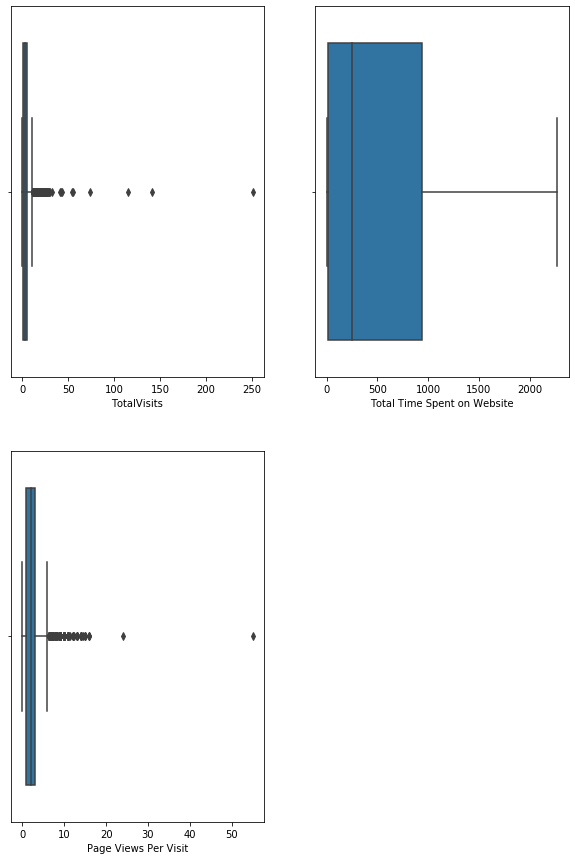

In [39]:
# Plotting box plots to continuous varibles

plt.figure(figsize=(10,15))
for i in enumerate(features):
    plt.subplot(2,2,i[0]+1)
    sns.boxplot(df[i[1]])

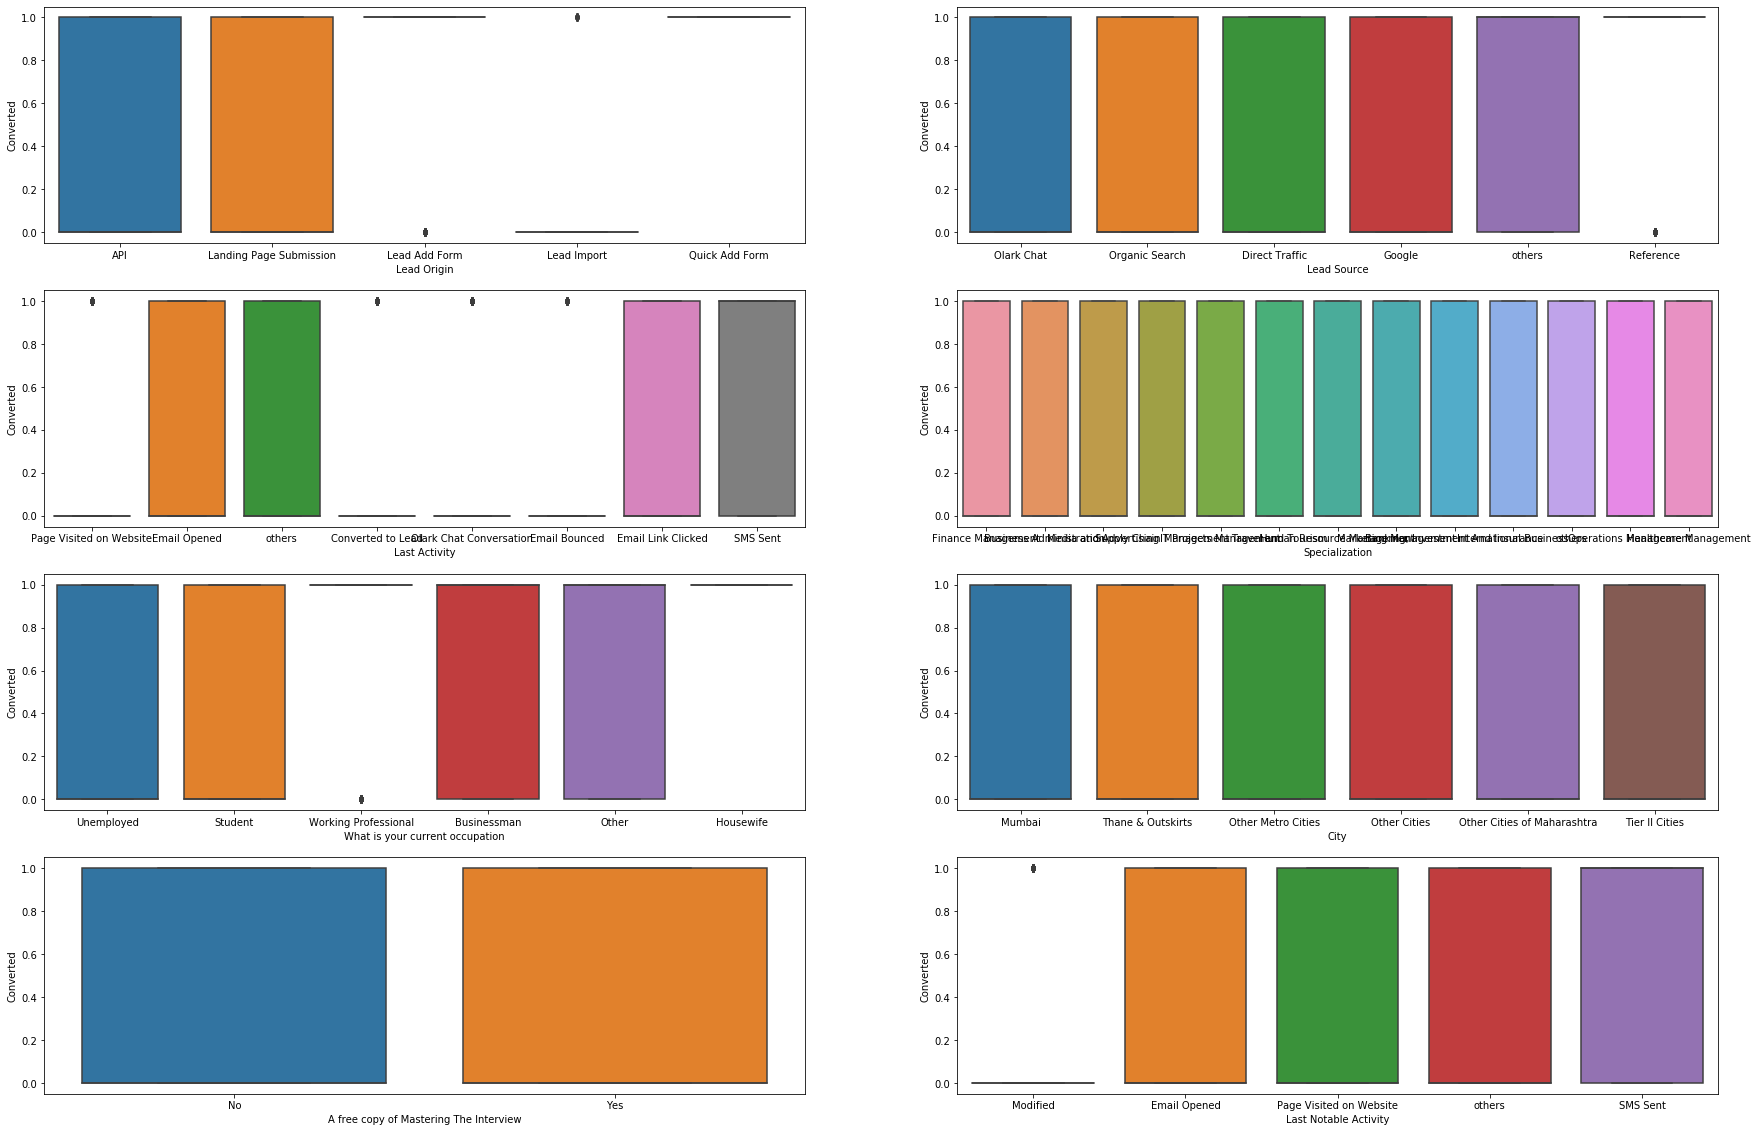

In [40]:
# Plotting box plots to categorical variables

plt.figure(figsize=(30, 20))
plt.subplot(4,2,1)
sns.boxplot(x = 'Lead Origin', y = 'Converted', data = df)
plt.subplot(4,2,2)
sns.boxplot(x = 'Lead Source', y = 'Converted', data = df)
plt.subplot(4,2,3)
sns.boxplot(x = 'Last Activity', y = 'Converted', data = df)
plt.subplot(4,2,4)
sns.boxplot(x = 'Specialization', y = 'Converted', data = df)
plt.subplot(4,2,5)
sns.boxplot(x = 'What is your current occupation', y = 'Converted', data = df)
plt.subplot(4,2,6)
sns.boxplot(x = 'City', y = 'Converted', data = df)
plt.subplot(4,2,7)
sns.boxplot(x = 'A free copy of Mastering The Interview', y = 'Converted', data = df)
plt.subplot(4,2,8)
sns.boxplot(x = 'Last Notable Activity', y = 'Converted', data = df)
plt.show()

In [41]:
# Capping the outliers with 0.99 percentiles

q1 = df['TotalVisits'].quantile(0.99)
q2 = df['Page Views Per Visit'].quantile(0.99)


df['TotalVisits'][df['TotalVisits']>=q1] = q1
df['Page Views Per Visit'][df['Page Views Per Visit']>=q2] = q2


In [42]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,617188.435606,0.385390,3.327814,487.698268,2.329050
std,23405.995698,0.486714,3.228466,548.021466,1.971347
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000
max,660737.000000,1.000000,17.000000,2272.000000,9.000000


### Data Preparation

In [43]:
df.head(15)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0.0,0,0.00,Page Visited on Website,Finance Management,Unemployed,Mumbai,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,5.0,674,2.50,Email Opened,Finance Management,Unemployed,Mumbai,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.00,Email Opened,Business Administration,Student,Mumbai,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.00,others,Media and Advertising,Unemployed,Mumbai,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,1,2.0,1428,1.00,Converted to Lead,Finance Management,Unemployed,Mumbai,No,Modified
5,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,API,Olark Chat,0,0.0,0,0.00,Olark Chat Conversation,Finance Management,Unemployed,Mumbai,No,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,1,2.0,1640,2.00,Email Opened,Supply Chain Management,Unemployed,Mumbai,No,Modified
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,660664,API,Olark Chat,0,0.0,0,0.00,Olark Chat Conversation,Finance Management,Unemployed,Mumbai,No,Modified
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,660624,Landing Page Submission,Direct Traffic,0,2.0,71,2.00,Email Opened,IT Projects Management,Unemployed,Thane & Outskirts,Yes,Email Opened
9,af465dfc-7204-4130-9e05-33231863c4b5,660616,API,Google,0,4.0,58,4.00,Email Opened,Finance Management,Unemployed,Mumbai,No,Email Opened


In [44]:
# Mapping Yes/No in categorical columns to 1 and 0

varlist =  ['A free copy of Mastering The Interview']

def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
df[varlist] = df[varlist].apply(binary_map)

In [45]:
df.head(10)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Finance Management,Unemployed,Mumbai,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,Finance Management,Unemployed,Mumbai,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Mumbai,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,others,Media and Advertising,Unemployed,Mumbai,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Finance Management,Unemployed,Mumbai,0,Modified
5,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,API,Olark Chat,0,0.0,0,0.0,Olark Chat Conversation,Finance Management,Unemployed,Mumbai,0,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,1,2.0,1640,2.0,Email Opened,Supply Chain Management,Unemployed,Mumbai,0,Modified
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,660664,API,Olark Chat,0,0.0,0,0.0,Olark Chat Conversation,Finance Management,Unemployed,Mumbai,0,Modified
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,660624,Landing Page Submission,Direct Traffic,0,2.0,71,2.0,Email Opened,IT Projects Management,Unemployed,Thane & Outskirts,1,Email Opened
9,af465dfc-7204-4130-9e05-33231863c4b5,660616,API,Google,0,4.0,58,4.0,Email Opened,Finance Management,Unemployed,Mumbai,0,Email Opened


In [46]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(df[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
                            'What is your current occupation','City','Last Notable Activity']], drop_first=True)

# Adding the results to the master dataframe
df = pd.concat([df, dummy1], axis=1)

In [47]:
df.shape

(9240, 56)

In [48]:
# We have created dummies for the below variables, so we can drop them

df = df.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
                            'What is your current occupation','City','Last Notable Activity'], axis=1)

In [49]:
df.head()

,Prospect ID,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_others,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_others,Specialization_Business Administration,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_others,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Modified,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_others
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0.0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,5.0,674,2.5,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,1,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,1,2.0,1428,1.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0


### Test-train split of data

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
# Putting feature variable to X
X = df.drop(['Prospect ID','Lead Number','Converted'], axis=1)

X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_others,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_others,Specialization_Business Administration,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_others,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Modified,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_others
0,0.0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
4,2.0,1428,1.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0


In [52]:
# Putting response variable to y
y = df['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [53]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Feature Scaling

In [54]:
from sklearn.preprocessing import StandardScaler

In [55]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_others,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_others,Specialization_Business Administration,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_others,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Modified,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_others
1871,-1.022595,-0.885371,-1.180474,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
6795,0.205373,0.005716,-0.503379,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
3516,0.512365,-0.691418,0.092260,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
8105,0.512365,1.365219,1.364995,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
3934,-1.022595,-0.885371,-1.180474,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0


In [56]:
Conversion_check = (sum(df['Converted'])/len(df['Converted'].index))*100
Conversion_check

38.53896103896104

#### Checking for correlations

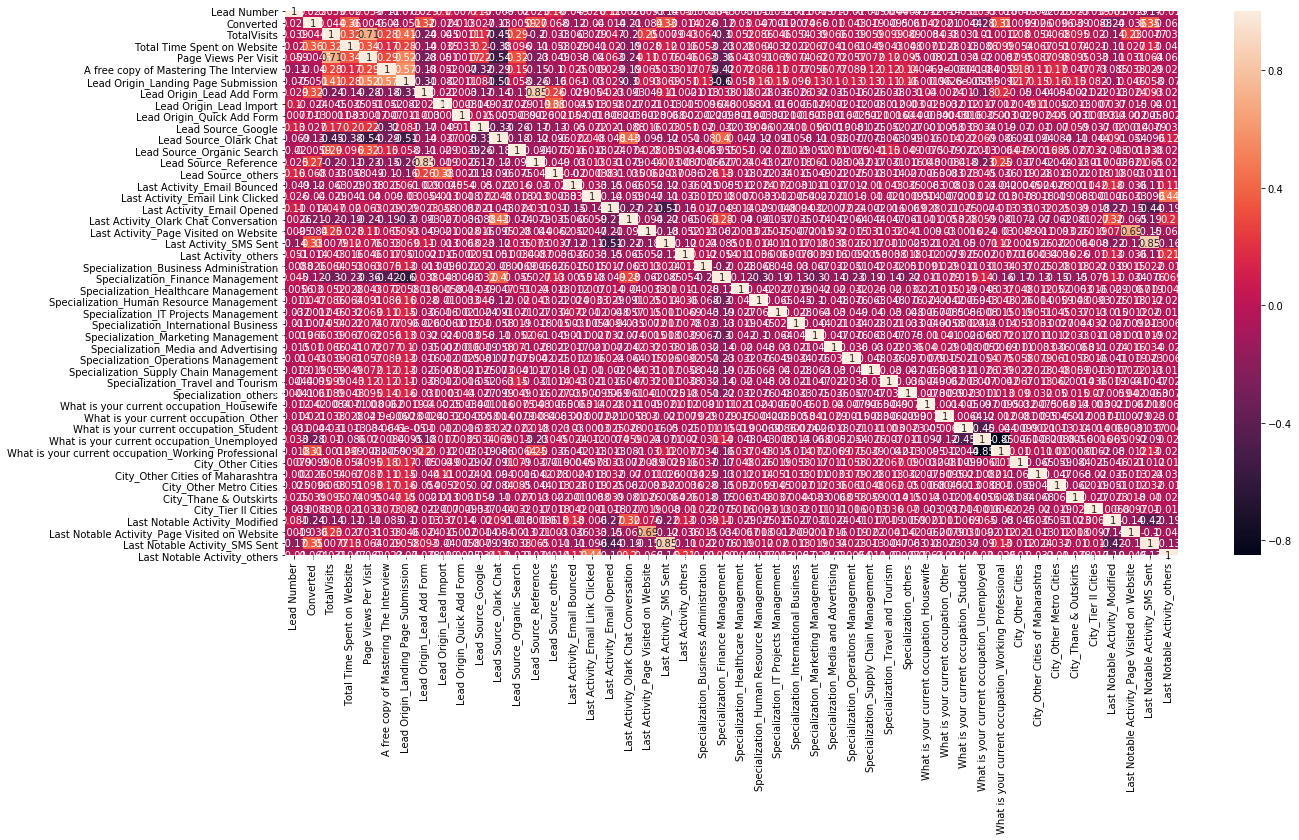

In [57]:
plt.figure(figsize = (20,10))       
sns.heatmap(df.corr(),annot = True)
plt.show()

In [58]:
df.corr()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_others,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_others,Specialization_Business Administration,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_others,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Modified,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_others
Lead Number,1.000000,0.025157,0.038873,0.020329,0.059445,-0.109696,-0.075012,0.029158,0.104726,0.007748,0.131736,-0.068590,-0.020389,0.025042,0.160780,-0.048827,0.025745,0.107735,0.002579,0.009524,-0.137925,0.051325,-0.008839,0.044516,-0.005607,-0.010532,-0.031586,-0.011288,-0.001916,-0.015190,-0.010001,-0.019434,-0.004434,0.000409,-0.011909,-0.013992,-0.031019,0.033381,-0.017605,0.007872,-0.001991,-0.024503,0.025089,-0.039357,0.080591,0.001868,-0.169987,-0.010249
Converted,0.025157,1.000000,0.043716,0.362483,-0.004603,-0.039820,-0.051236,0.321702,-0.023695,0.013138,0.027221,-0.129459,-0.005879,0.270830,0.067693,-0.120095,-0.039690,-0.013850,-0.210809,-0.083771,0.325600,-0.014220,0.025791,-0.121951,0.030306,0.047130,-0.001200,-0.007441,0.065853,0.010264,0.043272,0.019245,-0.009457,-0.006071,0.041567,0.020505,-0.004375,-0.281065,0.313837,0.009859,0.025513,0.009576,0.039189,-0.008779,-0.244294,-0.036051,0.351845,-0.063782
TotalVisits,0.038873,0.043716,1.000000,0.324556,0.706203,0.280920,0.408685,-0.237099,-0.044902,-0.001056,0.170355,-0.446415,0.289378,-0.198982,-0.033494,-0.063030,-0.028923,0.046929,-0.196371,0.247987,0.007934,0.042613,0.064326,-0.302139,0.051526,0.085928,0.045724,0.053816,0.039375,0.065970,0.039025,0.058662,0.098902,0.089007,-0.008440,0.037699,-0.030557,0.010091,-0.001191,0.080064,0.053680,0.068444,0.094712,0.020213,-0.143270,0.228911,0.007747,-0.030828
Total Time Spent on Website,0.020329,0.362483,0.324556,1.000000,0.336715,0.168298,0.276009,-0.139681,-0.034926,0.032831,0.199786,-0.376768,0.096123,-0.107361,-0.057897,-0.028543,-0.041355,0.019968,-0.191667,0.028051,0.117223,0.015541,0.053244,-0.231326,0.027873,0.063852,0.032481,0.022154,0.067445,0.040589,0.060720,0.049050,0.042640,0.048131,0.007088,0.028115,-0.012518,-0.086489,0.099241,0.054251,0.066759,0.051112,0.074099,0.020840,-0.106857,0.026644,0.125076,-0.046848
Page Views Per Visit,0.059445,-0.004603,0.706203,0.336715,1.000000,0.292589,0.520359,-0.279637,-0.051459,-0.001737,0.222173,-0.535693,0.319846,-0.233923,-0.049310,-0.038142,-0.039554,0.063467,-0.243285,0.111143,0.075744,0.046194,0.062734,-0.357447,0.043101,0.090945,0.068536,0.074469,0.062116,0.071861,0.056504,0.071790,0.117566,0.094709,-0.007999,0.021214,-0.033627,0.020152,-0.008192,0.095279,0.086824,0.097670,0.094629,0.033293,-0.111028,0.030976,0.064299,-0.062297
A free copy of Mastering The Interview,-0.109696,-0.039820,0.280920,0.168298,0.292589,1.000000,0.569633,-0.180893,-0.052178,-0.007015,-0.315671,-0.293169,0.147824,-0.151987,-0.100769,0.025446,-0.008993,0.0286

# Model Building

In [59]:
import statsmodels.api as sm

In [60]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6421
Model Family:                Binomial   Df Model:                           46
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2658.5
Date:                Mon, 07 Sep 2020   Deviance:                       5317.0
Time:                        20:11:17   Pearson chi2:                 7.34e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.5101      1.133     -1.333      0.182      -3.730       0.710
TotalVisits                                              0.2965      0.049      6.064      0.000       0.201       0.392
Total Time Spent on Website                              1.0791      0.040     27.104      0.000       1.001       1.157
Page Views Per Visit                                    -0.2562      0.055     -4.626      0.000      -0.365      -0.148
A free copy of Mastering The Interview                  -0.1202      0.107     -1.124      0.261      -0.330       0.089
Lead Origin_Landing Page Submission                     -0.4020      0.118     -3.403      0.001      -0.634      -0.170
Lead Origin_Lead Add Form                                4.0570      0.423      9.601      0.000       3.229       4.885
Lead Origin_Lead Import                                 -0.4059      0.577     -0.704      0.482      -1.536       0.725
Lead Origin_Quick Add Form                              22.1529   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Lead Source_Google                                       0.3289      0.113      2.905      0.004       0.107       0.551
Lead Source_Olark Chat                                   1.1810      0.161      7.315      0.000       0.865       1.497
Lead Source_Organic Search                               0.1380      0.132      1.048      0.295      -0.120       0.396
Lead Source_Reference                                   -0.4459      0.468     -0.952      0.341      -1.364       0.472
Lead Source_others                                       0.3781      0.267      1.416      0.157      -0.145       0.901
Last Activity_Email Bounced                             -1.0938      0.375     -2.920      0.004      -1.828      -0.360
Last Activity_Email Link Clicked                         0.1080      0.341      0.317      0.751      -0.560       0.775
Last Activity_Email Opened                               0.9419      0.251      3.749      0.000       0.450       1.434
Last Activity_Olark Chat Conversation                   -0.5182      0.279     -1.856      0.063      -1.065       0.029
Last Activity_Page Visited on Website                    0.1618      0.304      0.532      0.595      -0.434       0.758
Last Activity_SMS Sent                                   1.2949      0.252      5.128      0.000       0.800       1.790
Last Activity_others                                     0.8003      0.296      2.703      0.007       0.220       1.381
Specialization_Business Administration                  -0.3339      0.242     -1.378      0.168      -0.809       0.141
Specialization_Finance Management                       -0

## Feature selection using RFE an d manual approach

In [61]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [62]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)
rfe = rfe.fit(X_train, y_train)

In [63]:
rfe.support_

array([False,  True, False, False, False,  True, False, False, False,
        True, False, False, False,  True, False,  True,  True, False,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
        True, False, False, False, False, False,  True, False,  True,
       False])

In [64]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 10),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 11),
 ('A free copy of Mastering The Interview', False, 18),
 ('Lead Origin_Landing Page Submission', False, 2),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 5),
 ('Lead Origin_Quick Add Form', False, 8),
 ('Lead Source_Google', False, 7),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 22),
 ('Lead Source_Reference', False, 30),
 ('Lead Source_others', False, 6),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 27),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Page Visited on Website', False, 26),
 ('Last Activity_SMS Sent', True, 1),
 ('Last Activity_others', True, 1),
 ('Specialization_Business Administration', False, 16),
 ('Specialization_Finance Management', False, 3),
 ('Specialization_Healthcare Management', Fa

In [65]:
col = X_train.columns[rfe.support_]

In [66]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Reference',
       'Lead Source_others', 'Last Activity_Email Link Clicked',
       'Last Activity_Page Visited on Website',
       'Specialization_Business Administration',
       'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Supply Chain Management',
       'Specialization_Travel and Tourism', 'Specialization_others',
       'City_Other Cities', 'City_Other Cities of Mah

In [67]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2715.0
Date:                Mon, 07 Sep 2020   Deviance:                       5429.9
Time:                        20:11:20   Pearson chi2:                 7.33e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.3727      1.123     -1.222      0.222      -3.574       0.828
Total Time Spent on Website                              1.0977      0.039     28.048      0.000       1.021       1.174
Lead Origin_Lead Add Form                                3.9163      0.181     21.579      0.000       3.561       4.272
Lead Source_Olark Chat                                   1.1464      0.102     11.272      0.000       0.947       1.346
Last Activity_Email Bounced                             -1.2032      0.306     -3.935      0.000      -1.802      -0.604
Last Activity_Email Opened                               0.5660      0.120      4.729      0.000       0.331       0.801
Last Activity_Olark Chat Conversation                   -0.5903      0.190     -3.114      0.002      -0.962      -0.219
Last Activity_SMS Sent                                   1.0735      0.169      6.370      0.000       0.743       1.404
Last Activity_others                                     0.7546      0.211      3.580      0.000       0.342       1.168
What is your current occupation_Housewife               22.5150   1.36e+04      0.002      0.999   -2.67e+04    2.67e+04
What is your current occupation_Other                   -0.2515      1.373     -0.183      0.855      -2.943       2.440
What is your current occupation_Student                 -0.0582      1.141     -0.051      0.959      -2.294       2.178
What is your current occupation_Unemployed              -0.4048      1.117     -0.362      0.717      -2.595       1.785
What is your current occupation_Working Professional     2.4027      1.132      2.123      0.034       0.185       4.620
Last Notable Activity_Modified                          -0.5759      0.103     -5.567      0.000      -0.779      -0.373
Last Notable Activity_SMS Sent                           0.7116      0.176      4.050      0.000       0.367       1.056
========================================================================================================================
"""

In [68]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.261747
6795    0.230548
3516    0.304914
8105    0.818500
3934    0.166202
4844    0.992310
3297    0.117883
8071    0.992140
987     0.155999
7423    0.897986
dtype: float64

In [69]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.26174724, 0.23054755, 0.30491361, 0.81850049, 0.16620218,
       0.99230963, 0.11788295, 0.99214011, 0.15599853, 0.89798616])

Creating a dataframe with the actual converted and the predicted probabilities

In [70]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID
0,0,0.261747,1871
1,0,0.230548,6795
2,0,0.304914,3516
3,0,0.818500,8105
4,0,0.166202,3934


##### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [71]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted
0,0,0.261747,1871,0
1,0,0.230548,6795,0
2,0,0.304914,3516,0
3,0,0.818500,8105,1
4,0,0.166202,3934,0


In [72]:
from sklearn import metrics

In [73]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3548  454]
 [ 744 1722]]


In [74]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8147804576376005


#### checking VIF's

In [75]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [76]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,What is your current occupation_Unemployed,9.11
6,Last Activity_SMS Sent,7.20
14,Last Notable Activity_SMS Sent,6.76
4,Last Activity_Email Opened,4.23
13,Last Notable Activity_Modified,3.02
5,Last Activity_Olark Chat Conversation,2.03
12,What is your current occupation_Working Profes...,1.83
2,Lead Source_Olark Chat,1.76
3,Last Activity_Email Bounced,1.26
0,Total Time Spent on Website,1.25


Since 'What is your current occupation_Unemployed' have vIF of 9.11 we are dropping it and again building the model

In [77]:
col = col.drop('What is your current occupation_Unemployed', 1)
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Last Activity_Email Bounced',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_SMS Sent', 'Last Activity_others',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Modified', 'Last Notable Activity_SMS Sent'],
      dtype='object')

In [78]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2715.0
Date:                Mon, 07 Sep 2020   Deviance:                       5430.1
Time:                        20:11:21   Pearson chi2:                 7.34e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.7774      0.118    -15.076      0.000      -2.008      -1.546
Total Time Spent on Website                              1.0979      0.039     28.059      0.000       1.021       1.175
Lead Origin_Lead Add Form                                3.9181      0.181     21.593      0.000       3.562       4.274
Lead Source_Olark Chat                                   1.1465      0.102     11.272      0.000       0.947       1.346
Last Activity_Email Bounced                             -1.2038      0.306     -3.936      0.000      -1.803      -0.604
Last Activity_Email Opened                               0.5661      0.120      4.729      0.000       0.331       0.801
Last Activity_Olark Chat Conversation                   -0.5898      0.190     -3.112      0.002      -0.961      -0.218
Last Activity_SMS Sent                                   1.0731      0.169      6.367      0.000       0.743       1.403
Last Activity_others                                     0.7593      0.210      3.611      0.000       0.347       1.171
What is your current occupation_Housewife               22.9188   1.36e+04      0.002      0.999   -2.67e+04    2.67e+04
What is your current occupation_Other                    0.1528      0.800      0.191      0.849      -1.416       1.721
What is your current occupation_Student                  0.3463      0.235      1.473      0.141      -0.114       0.807
What is your current occupation_Working Professional     2.8070      0.188     14.933      0.000       2.439       3.175
Last Notable Activity_Modified                          -0.5757      0.103     -5.567      0.000      -0.778      -0.373
Last Notable Activity_SMS Sent                           0.7119      0.176      4.052      0.000       0.368       1.056
========================================================================================================================
"""

In [79]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [80]:
y_train_pred[:10]

array([0.26175887, 0.23058611, 0.30493594, 0.81854062, 0.16623084,
       0.99230877, 0.11788773, 0.99218848, 0.15605089, 0.89802391])

In [81]:
y_train_pred_final['Converted_Prob'] = y_train_pred

In [82]:
# Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted
0,0,0.261759,1871,0
1,0,0.230586,6795,0
2,0,0.304936,3516,0
3,0,0.818541,8105,1
4,0,0.166231,3934,0


In [83]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8147804576376005


In [84]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Last Activity_SMS Sent,6.49
13,Last Notable Activity_SMS Sent,6.16
12,Last Notable Activity_Modified,2.07
2,Lead Source_Olark Chat,1.75
5,Last Activity_Olark Chat Conversation,1.74
4,Last Activity_Email Opened,1.26
0,Total Time Spent on Website,1.25
1,Lead Origin_Lead Add Form,1.24
11,What is your current occupation_Working Profes...,1.16
3,Last Activity_Email Bounced,1.14


Since we have VIF of 6.49 for 'Last Activity_SMS Sent' we are dropping it and agin building the model

In [85]:
# Let's drop Last Activity_SMS Sent since it has a high VIF
col = col.drop('Last Activity_SMS Sent')
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Last Activity_Email Bounced',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_others', 'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Modified', 'Last Notable Activity_SMS Sent'],
      dtype='object')

In [86]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2735.2
Date:                Mon, 07 Sep 2020   Deviance:                       5470.5
Time:                        20:11:22   Pearson chi2:                 7.48e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.5255      0.106    -14.376      0.000      -1.734      -1.318
Total Time Spent on Website                              1.0997      0.039     28.233      0.000       1.023       1.176
Lead Origin_Lead Add Form                                3.9982      0.182     21.961      0.000       3.641       4.355
Lead Source_Olark Chat                                   1.1523      0.101     11.364      0.000       0.954       1.351
Last Activity_Email Bounced                             -1.5878      0.300     -5.297      0.000      -2.175      -1.000
Last Activity_Email Opened                               0.2837      0.107      2.661      0.008       0.075       0.493
Last Activity_Olark Chat Conversation                   -0.9673      0.177     -5.463      0.000      -1.314      -0.620
Last Activity_others                                     0.3982      0.200      1.991      0.046       0.006       0.790
What is your current occupation_Housewife               22.8771   1.35e+04      0.002      0.999   -2.65e+04    2.65e+04
What is your current occupation_Other                    0.0182      0.798      0.023      0.982      -1.546       1.582
What is your current occupation_Student                  0.3255      0.233      1.394      0.163      -0.132       0.783
What is your current occupation_Working Professional     2.7682      0.186     14.862      0.000       2.403       3.133
Last Notable Activity_Modified                          -0.4089      0.098     -4.177      0.000      -0.601      -0.217
Last Notable Activity_SMS Sent                           1.5313      0.122     12.541      0.000       1.292       1.771
========================================================================================================================
"""

In [87]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [88]:
y_train_pred[:10]

array([0.25669439, 0.22520408, 0.29944599, 0.81861717, 0.18661926,
       0.99201768, 0.11461328, 0.99291555, 0.21956825, 0.8981686 ])

In [89]:
y_train_pred_final['Converted_Prob'] = y_train_pred

In [90]:
# Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted
0,0,0.256694,1871,0
1,0,0.225204,6795,0
2,0,0.299446,3516,0
3,0,0.818617,8105,1
4,0,0.186619,3934,0


In [91]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.814935064935065


In [92]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Source_Olark Chat,1.74
5,Last Activity_Olark Chat Conversation,1.63
11,Last Notable Activity_Modified,1.56
0,Total Time Spent on Website,1.25
1,Lead Origin_Lead Add Form,1.23
4,Last Activity_Email Opened,1.23
12,Last Notable Activity_SMS Sent,1.19
10,What is your current occupation_Working Profes...,1.16
3,Last Activity_Email Bounced,1.11
6,Last Activity_others,1.07


In [93]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3553,  449],
       [ 748, 1718]], dtype=int64)

Since 'What is your current occupation_Housewife' is having high P-value of 0.99 we are dropping it and again building the model

In [94]:
col = col.drop('What is your current occupation_Housewife')
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Last Activity_Email Bounced',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_others', 'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Modified', 'Last Notable Activity_SMS Sent'],
      dtype='object')

In [95]:
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2742.1
Date:                Mon, 07 Sep 2020   Deviance:                       5484.3
Time:                        20:11:23   Pearson chi2:                 7.52e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.5275      0.106    -14.415      0.000      -1.735      -1.320
Total Time Spent on Website                              1.0988      0.039     28.242      0.000       1.022       1.175
Lead Origin_Lead Add Form                                4.0079      0.182     22.047      0.000       3.652       4.364
Lead Source_Olark Chat                                   1.1463      0.101     11.317      0.000       0.948       1.345
Last Activity_Email Bounced                             -1.5893      0.300     -5.300      0.000      -2.177      -1.002
Last Activity_Email Opened                               0.2938      0.106      2.761      0.006       0.085       0.502
Last Activity_Olark Chat Conversation                   -0.9653      0.177     -5.453      0.000      -1.312      -0.618
Last Activity_others                                     0.4220      0.199      2.123      0.034       0.032       0.812
What is your current occupation_Other                    0.0129      0.798      0.016      0.987      -1.551       1.577
What is your current occupation_Student                  0.3205      0.233      1.373      0.170      -0.137       0.778
What is your current occupation_Working Professional     2.7623      0.186     14.834      0.000       2.397       3.127
Last Notable Activity_Modified                          -0.4036      0.098     -4.133      0.000      -0.595      -0.212
Last Notable Activity_SMS Sent                           1.5342      0.122     12.579      0.000       1.295       1.773
========================================================================================================================
"""

In [96]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [97]:
y_train_pred[:10]

array([0.25726682, 0.2266365 , 0.30003802, 0.81857885, 0.18788955,
       0.99196518, 0.1155158 , 0.99313136, 0.22005641, 0.89809401])

In [98]:
y_train_pred_final['Converted_Prob'] = y_train_pred

In [99]:
# Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted
0,0,0.257267,1871,0
1,0,0.226636,6795,0
2,0,0.300038,3516,0
3,0,0.818579,8105,1
4,0,0.187890,3934,0


In [100]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.814625850340136


In [101]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Source_Olark Chat,1.74
5,Last Activity_Olark Chat Conversation,1.63
10,Last Notable Activity_Modified,1.56
0,Total Time Spent on Website,1.25
1,Lead Origin_Lead Add Form,1.23
4,Last Activity_Email Opened,1.23
11,Last Notable Activity_SMS Sent,1.19
9,What is your current occupation_Working Profes...,1.16
3,Last Activity_Email Bounced,1.11
6,Last Activity_others,1.07


Here we have high P-value to the column 'What is your current occupation_Other' we are dropping it and again building the model

In [102]:
col = col.drop('What is your current occupation_Other')
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Last Activity_Email Bounced',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_others', 'What is your current occupation_Student',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Modified', 'Last Notable Activity_SMS Sent'],
      dtype='object')

In [103]:
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6456
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2742.1
Date:                Mon, 07 Sep 2020   Deviance:                       5484.3
Time:                        20:11:23   Pearson chi2:                 7.52e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.5274      0.106    -14.418      0.000      -1.735      -1.320
Total Time Spent on Website                              1.0988      0.039     28.255      0.000       1.023       1.175
Lead Origin_Lead Add Form                                4.0079      0.182     22.047      0.000       3.652       4.364
Lead Source_Olark Chat                                   1.1462      0.101     11.317      0.000       0.948       1.345
Last Activity_Email Bounced                             -1.5894      0.300     -5.300      0.000      -2.177      -1.002
Last Activity_Email Opened                               0.2938      0.106      2.761      0.006       0.085       0.502
Last Activity_Olark Chat Conversation                   -0.9652      0.177     -5.453      0.000      -1.312      -0.618
Last Activity_others                                     0.4220      0.199      2.123      0.034       0.032       0.812
What is your current occupation_Student                  0.3205      0.233      1.373      0.170      -0.137       0.778
What is your current occupation_Working Professional     2.7623      0.186     14.834      0.000       2.397       3.127
Last Notable Activity_Modified                          -0.4036      0.098     -4.133      0.000      -0.595      -0.212
Last Notable Activity_SMS Sent                           1.5342      0.122     12.581      0.000       1.295       1.773
========================================================================================================================
"""

In [104]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [105]:
y_train_pred[:10]

array([0.25726702, 0.22664201, 0.30003903, 0.81858317, 0.18789024,
       0.99196529, 0.11551756, 0.99313107, 0.22006537, 0.89809775])

In [106]:
# calculating Converted probabilities from the  model

y_train_pred_final['Converted_Prob'] = y_train_pred

In [107]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted
0,0,0.257267,1871,0
1,0,0.226642,6795,0
2,0,0.300039,3516,0
3,0,0.818583,8105,1
4,0,0.187890,3934,0


In [108]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.814625850340136


In [109]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Source_Olark Chat,1.74
5,Last Activity_Olark Chat Conversation,1.63
9,Last Notable Activity_Modified,1.56
0,Total Time Spent on Website,1.24
1,Lead Origin_Lead Add Form,1.23
4,Last Activity_Email Opened,1.22
10,Last Notable Activity_SMS Sent,1.19
8,What is your current occupation_Working Profes...,1.16
3,Last Activity_Email Bounced,1.11
6,Last Activity_others,1.07


Dropping the column 'What is your current occupation_Student' as it is having high P-value

In [110]:
col = col.drop('What is your current occupation_Student')
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Last Activity_Email Bounced',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_others',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Modified', 'Last Notable Activity_SMS Sent'],
      dtype='object')

In [111]:
X_train_sm = sm.add_constant(X_train[col])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6457
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2743.1
Date:                Mon, 07 Sep 2020   Deviance:                       5486.1
Time:                        20:11:24   Pearson chi2:                 7.52e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.5219      0.106    -14.384      0.000      -1.729      -1.314
Total Time Spent on Website                              1.0987      0.039     28.257      0.000       1.022       1.175
Lead Origin_Lead Add Form                                4.0116      0.182     22.079      0.000       3.655       4.368
Lead Source_Olark Chat                                   1.1495      0.101     11.350      0.000       0.951       1.348
Last Activity_Email Bounced                             -1.5844      0.300     -5.277      0.000      -2.173      -0.996
Last Activity_Email Opened                               0.2970      0.106      2.793      0.005       0.089       0.505
Last Activity_Olark Chat Conversation                   -0.9625      0.177     -5.438      0.000      -1.309      -0.616
Last Activity_others                                     0.4183      0.199      2.104      0.035       0.029       0.808
What is your current occupation_Working Professional     2.7555      0.186     14.804      0.000       2.391       3.120
Last Notable Activity_Modified                          -0.4047      0.098     -4.146      0.000      -0.596      -0.213
Last Notable Activity_SMS Sent                           1.5322      0.122     12.573      0.000       1.293       1.771
========================================================================================================================
"""

In [112]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [113]:
y_train_pred[:10]

array([0.25958625, 0.22818593, 0.30258222, 0.81909697, 0.18956274,
       0.99193812, 0.11642683, 0.99311526, 0.2208129 , 0.89840814])

In [114]:
y_train_pred_final['Converted_Prob'] = y_train_pred

In [115]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted
0,0,0.259586,1871,0
1,0,0.228186,6795,0
2,0,0.302582,3516,0
3,0,0.819097,8105,1
4,0,0.189563,3934,0


In [116]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8143166357452072


In [117]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Source_Olark Chat,1.74
5,Last Activity_Olark Chat Conversation,1.63
8,Last Notable Activity_Modified,1.56
0,Total Time Spent on Website,1.24
1,Lead Origin_Lead Add Form,1.23
4,Last Activity_Email Opened,1.21
9,Last Notable Activity_SMS Sent,1.19
7,What is your current occupation_Working Profes...,1.16
3,Last Activity_Email Bounced,1.11
6,Last Activity_others,1.07


In [118]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3551,  451],
       [ 750, 1716]], dtype=int64)

#### Metrics beyond simple accuracy

In [119]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [120]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6958637469586375

In [121]:
# Let us calculate specificity
TN / float(TN+FP)

0.8873063468265867

In [122]:
# Calculate false postive rate
print(FP/ float(TN+FP))

0.11269365317341329


In [123]:
# positive predictive value 
print (TP / float(TP+FP))

0.7918781725888325


In [124]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8256219483840967


### Plotting ROC curve

In [126]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

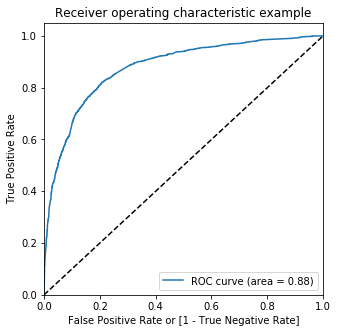

In [127]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

### Finding Optimal Cutoff point

In [128]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.259586,1871,0,1,1,1,0,0,0,0,0,0,0
1,0,0.228186,6795,0,1,1,1,0,0,0,0,0,0,0
2,0,0.302582,3516,0,1,1,1,1,0,0,0,0,0,0
3,0,0.819097,8105,1,1,1,1,1,1,1,1,1,1,0
4,0,0.189563,3934,0,1,1,0,0,0,0,0,0,0,0


In [129]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.582870  0.966748  0.346327
0.2   0.2  0.745826  0.902271  0.649425
0.3   0.3  0.796382  0.834550  0.772864
0.4   0.4  0.812925  0.761963  0.844328
0.5   0.5  0.814317  0.695864  0.887306
0.6   0.6  0.794991  0.585158  0.924288
0.7   0.7  0.781231  0.508921  0.949025
0.8   0.8  0.758967  0.413220  0.972014
0.9   0.9  0.707947  0.253041  0.988256


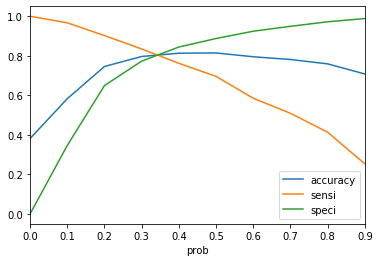

In [130]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.32 is the optimum point to take it as a cutoff probability.

In [131]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.32 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.259586,1871,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.228186,6795,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.302582,3516,0,1,1,1,1,0,0,0,0,0,0,0
3,0,0.819097,8105,1,1,1,1,1,1,1,1,1,1,0,1
4,0,0.189563,3934,0,1,1,0,0,0,0,0,0,0,0,0


In [132]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8013296227581942

In [133]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3157,  845],
       [ 440, 2026]], dtype=int64)

In [134]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [135]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8215733982157339

In [136]:
# Let us calculate specificity
TN / float(TN+FP)

0.788855572213893

In [137]:
# Calculate false positive rate
print(FP/ float(TN+FP))

0.21114442778610695


In [138]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7056774642981539


In [139]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8776758409785933


### Precision and Recall

In [140]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3551,  451],
       [ 750, 1716]], dtype=int64)

##### Precision
TP / TP + FP

In [141]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7918781725888325

##### Recall
TP / TP + FN

In [142]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6958637469586375

In [143]:
from sklearn.metrics import precision_score, recall_score

In [144]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7918781725888325

In [145]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.6958637469586375

### Precision and recall tradeoff

In [146]:
from sklearn.metrics import precision_recall_curve

In [147]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       0
 4       0
 5       1
 6       0
 7       1
 8       0
 9       1
 10      1
 11      0
 12      1
 13      1
 14      0
 15      0
 16      0
 17      0
 18      0
 19      1
 20      1
 21      1
 22      1
 23      1
 24      1
 25      1
 26      0
 27      1
 28      1
 29      0
 30      1
 31      0
 32      1
 33      0
 34      1
 35      0
 36      0
 37      0
 38      0
 39      0
 40      0
 41      0
 42      0
 43      0
 44      0
 45      0
 46      1
 47      0
 48      0
 49      1
 50      0
 51      1
 52      1
 53      1
 54      1
 55      0
 56      1
 57      0
 58      1
 59      0
 60      0
 61      0
 62      1
 63      0
 64      1
 65      0
 66      1
 67      1
 68      0
 69      1
 70      1
 71      0
 72      1
 73      0
 74      0
 75      0
 76      1
 77      0
 78      0
 79      0
 80      0
 81      0
 82      0
 83      0
 84      0
 85      0
 86      0
 87      0
 88      1
 89      1
 90      1

In [148]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

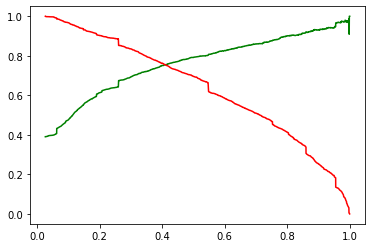

In [149]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Making predictions on test set

In [150]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [151]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Last Activity_Email Bounced,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_others,What is your current occupation_Working Professional,Last Notable Activity_Modified,Last Notable Activity_SMS Sent
4269,0.964504,0,0,0,0,0,0,0,0,1
2376,-0.885371,1,0,0,0,0,0,0,0,1
7766,-0.777416,0,0,0,0,0,1,1,0,0
9199,-0.885371,0,1,0,0,1,0,0,1,0
4359,-0.885371,1,0,0,1,0,0,0,0,0


In [152]:
X_test_sm = sm.add_constant(X_test)

In [153]:
y_test_pred = res.predict(X_test_sm)

In [154]:
y_test_pred[:10]

4269    0.744595
2376    0.954748
7766    0.689501
9199    0.062246
4359    0.859845
9186    0.566576
1631    0.459792
8963    0.159919
8007    0.099055
5324    0.345078
dtype: float64

In [155]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [156]:
# Let's see the head
y_pred_1.head()

,0
4269,0.744595
2376,0.954748
7766,0.689501
9199,0.062246
4359,0.859845


In [157]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [158]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [159]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [160]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [161]:
y_pred_final.head()

,Converted,Prospect ID,0
0,1,4269,0.744595
1,1,2376,0.954748
2,1,7766,0.689501
3,0,9199,0.062246
4,1,4359,0.859845


In [162]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [163]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Prospect ID','Converted','Converted_Prob'], axis=1)

In [164]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob
0,4269,1,0.744595
1,2376,1,0.954748
2,7766,1,0.689501
3,9199,0,0.062246
4,4359,1,0.859845


In [165]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.40 else 0)


## calculating th probability of Converting a customer from predicted values

In [166]:
y_pred_final['Conversion_probability'] = (y_pred_final.Converted_Prob)*100

In [167]:
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,final_predicted,Conversion_probability
0,4269,1,0.744595,1,74.459546
1,2376,1,0.954748,1,95.474799
2,7766,1,0.689501,1,68.950103
3,9199,0,0.062246,0,6.224641
4,4359,1,0.859845,1,85.984536


In [168]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8106060606060606

In [169]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1419,  258],
       [ 267,  828]], dtype=int64)

In [170]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [171]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7561643835616438

In [172]:
# Let us calculate specificity
TN / float(TN+FP)

0.8461538461538461